# Regressão linear com Python


** Aula 1 **
*Predicao de valor de imoveis usando regressão linear*

In [1]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importar dataset
dfdados = pd.read_csv('USA_Housing.csv')

## Analise exploratoria de dados


In [3]:
dfdados.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
dfdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
#sns.pairplot(dfdados)

* caso ocorra erro  IOPub data rate exceeded.
Aualize se jupyer notebook executando via console como administrador
pip install notebook --upgrade 
OU  
conda upgrade notebook 
* via console 
jupyter notebook --generate-config
Abra o arquivo de configuração gerado descomente a linha e aumente o valor abaixo:
c.NotebookApp.iopub_data_rate_limit = 1000000000

## Split para treino.
*separando dados para treino e para teste*

In [6]:
dfdados.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
X=dfdados[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]


In [8]:
y=dfdados[['Price']]


### Split dos dados.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Biblioteca e criando modelo de regressão linear

In [10]:
# Alimentando nossa variavel regre com supepoderes de Rgressao Linear!
from sklearn.linear_model import LinearRegression
regre = LinearRegression()

### Treinando o modelo com os dados de Treino

In [11]:
regre.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

* Modelo Treinado!!!!!!

In [12]:
#predição
predictions = regre.predict(X_test)

In [13]:
X_test[0:1]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1718,66774.995817,5.717143,7.795215,4.32,36788.980327


In [14]:
y_test[0:10]

,Price
1718,1.251689e+06
2511,8.730483e+05
345,1.696978e+06
2521,1.063964e+06
54,9.487883e+05
2866,7.300436e+05
2371,1.166925e+06
2952,7.054441e+05
45,1.499989e+06
4653,1.288199e+06


In [15]:
predictions[0:10]

array([[1258934.89505291],
       [ 822694.63411044],
       [1742214.3953012 ],
       [ 972937.00465161],
       [ 994545.99157748],
       [ 644486.33951947],
       [1078071.03841126],
       [ 854756.03225045],
       [1445901.34459024],
       [1203355.11911772]])

### Avaliação do modelo

In [16]:
predictions = regre.predict(X_test)

* Residual Histogram



In [17]:
y_test[0:1]

,Price
1718,1.251689e+06


In [18]:
predictions[0:1]

array([[1258934.89505291]])

In [19]:
y_test-predictions

,Price
1718,-7246.279350
2511,50353.685532
345,-45236.732469
2521,91027.283222
54,-45757.715868
...,...
3412,-51189.091431
4020,86828.018619
4635,-18317.139577
1700,-111719.674787


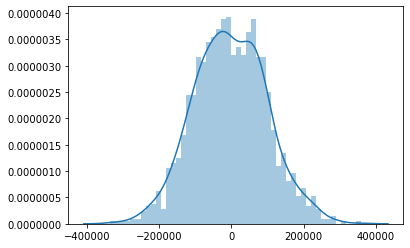

In [20]:
sns.distplot((y_test-predictions),bins=50);

* analise dos coeficientes

In [21]:
#coeficientes
regre.coef_


array([[2.16176350e+01, 1.65221120e+05, 1.21405377e+05, 1.31871878e+03,
        1.52251955e+01]])

In [22]:
coef= pd.DataFrame(regre.coef_[0],X.columns,columns=['Coeficiente'])
coef

,Coeficiente
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


### Métricas de avaliação para modelos de regressão

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Abaixo três metricas comuns para problemas de regressão:

**Mean absolute error ** (erro absoluto médio) (MAE) é a média do valor absoluto dos erros:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

** Mean Squared Error ** (erro médio quadrático) (MSE) é a média dos erros quadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

** Root Mean Square Error ** (raiz do erro quadrático médio) (RMSE) é a raiz quadrada da média dos erros quadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

** Essas valores devem ser minimizados: **

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81257.55795855918
MSE: 10169125565.897554
RMSE: 100842.08231635022


** Analise baseada em SCORE ** 
(Os valores abaixo deve ser maximizados!)



Função de pontuação de regressão de variância.
A melhor pontuação possível é 1.0, valores menores representam maior variação.

In [24]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)  

0.9185822770965284

Função de pontuação da regressão R ^ 2 (coeficiente de determinação).
A melhor pontuação possível é 1.0 e pode ser negativa (porque o modelo pode ser arbitrariamente pior). Um modelo constante que sempre prevê o valor esperado de y, desconsiderando os recursos de entrada, obteria uma pontuação de R ^ 2 de 0,0

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)  

0.9185060945363626

In [26]:
#Ex.
y_true = [1,2,3,4]
y_pred = [1,2,3,5]
r2_score(y_true, y_pred)

0.8